# Modelo mixto

In [1]:
datos <- read.csv('/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Modelo mixto/Modelo mixto (maquina-persona).csv')

In [8]:
dim(datos)

[1] 54  3

In [9]:
library(GAD)
library(Matrix)

Loading required package: matrixStats

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.



Definimos a los factores, donde el factor aleatorio es la persona. Además de la variable respuesta, que es la calificación. Hay que especificar cuál factor va a ser fijo y cuál aleatorio.

In [10]:
maquina <- as.factor(datos$Maquina)
maquina <- as.fixed(datos$Maquina)
persona <- as.factor(datos$Persona)
persona <- as.random(datos$Persona)
y<-datos$Calificacion

## ANOVA

In [96]:
m1 <- lm(y~ maquina*persona)
gad(m1) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
maquina,2,1755.26333,877.6316667,20.57608,2.855485e-04
persona,5,1241.89500,248.3790000,268.62540,1.937201e-27
maquina:persona,10,426.53000,42.6530000,46.12982,1.641250e-17
Residual,36,33.28667,0.9246296,NA,NA


Dado el valor de _p_ la interacción máquina-persona es estadísticamente significativa.

## Calculando las estimaciones de los componentes de varianza 

In [12]:
library(lme4)

In [13]:
m2 <- lmer(y ~ maquina + (1|persona) + (1|maquina:persona))

In [14]:
summary(m2)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ maquina + (1 | persona) + (1 | maquina:persona)

REML criterion at convergence: 215.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.26959 -0.54847 -0.01071  0.43937  2.54006 

Random effects:
 Groups          Name        Variance Std.Dev.
 maquina:persona (Intercept) 13.9095  3.7295  
 persona         (Intercept) 22.8584  4.7811  
 Residual                     0.9246  0.9616  
Number of obs: 54, groups:  maquina:persona, 18; persona, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)   52.356      2.486  21.062
maquina2       7.967      2.177   3.660
maquina3      13.917      2.177   6.393

Correlation of Fixed Effects:
         (Intr) maqun2
maquina2 -0.438       
maquina3 -0.438  0.500

## Calculando el porcentaje de varianza total de cada componente

In [92]:
summary(m2)['varcor']

$varcor
 Groups          Name        Std.Dev.
 maquina:persona (Intercept) 3.72954 
 persona         (Intercept) 4.78105 
 Residual                    0.96158 


In [81]:
vars <- c(13.9095,22.8584,0.9246)
porcentajes<-100*vars/sum(vars)
porcentajes

[1] 36.902567 60.644425  2.453008

## Gráfica de pastel 

In [93]:
library(plotrix)

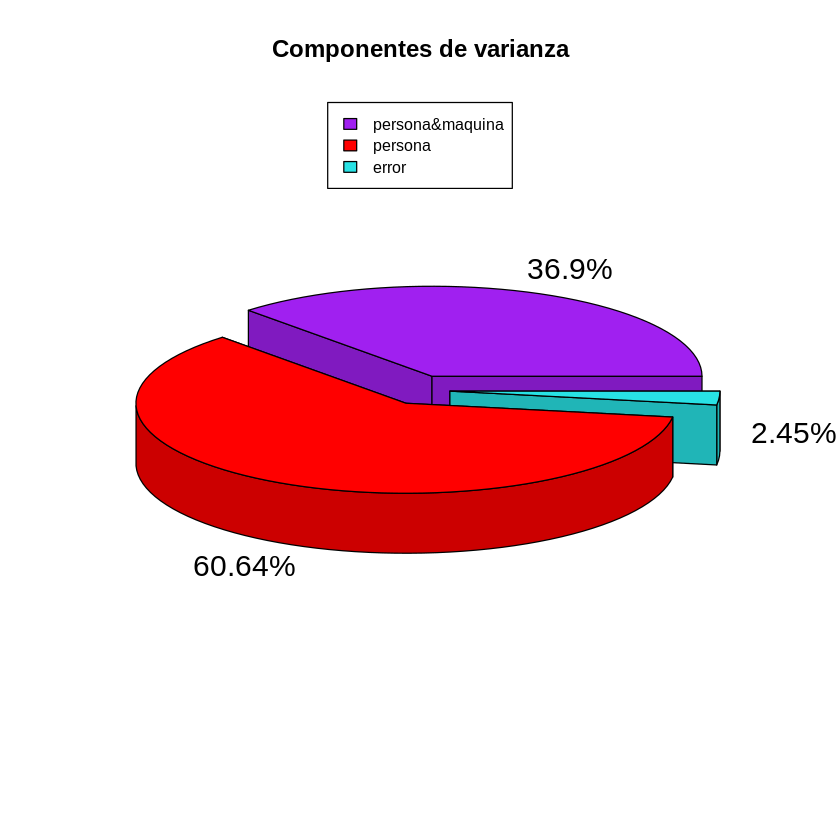

In [126]:
etiqueta<-paste(round(porcentajes,2),"%",sep = "")
colores<-c("purple","red","541")
pie3D(porcentajes,radius=0.9,explode=0.1,main="Componentes de varianza",col=colores, labels = etiqueta)
#"topright"
#Leyenda
legend('top',inset = 0.01,c("persona&maquina","persona","error"),cex=0.8,fill=colores)

Ya que el factor _persona_ es el que tiene una mayor variación, se puede concluir que las personas son las que influyen más en los resultados, por lo que se puede sugerir capacitar a los empleados.

In [99]:
(248.38-42.65)/9

[1] 22.85889

In [100]:
(42.65-0.92)/3

[1] 13.91

## Verificando los supuestos

In [101]:
residuos<- m1$res
estimados<- m1$fitted.values

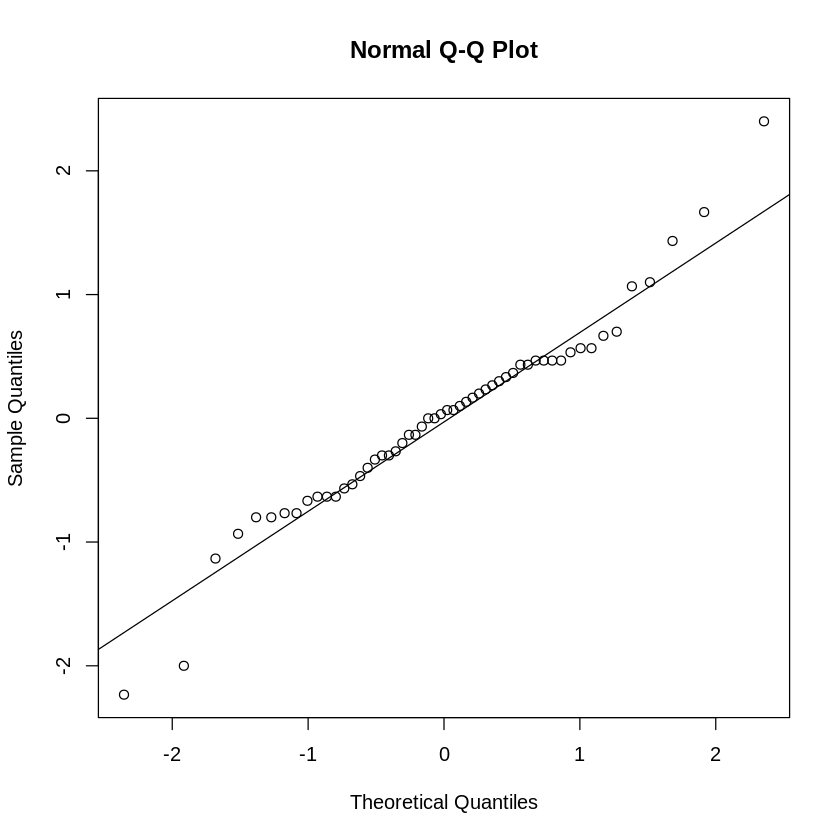

In [102]:
qqnorm(residuos)
qqline(residuos)

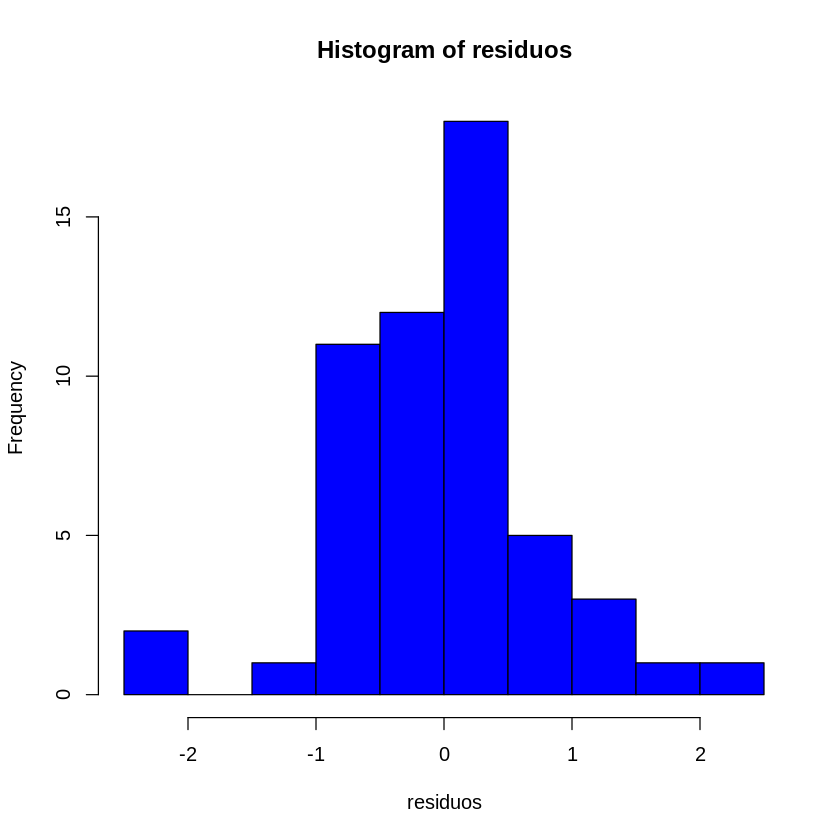

In [103]:
hist(residuos,col="blue")

In [104]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.96245, p-value = 0.08876


Dado el valor de _p_, no se rechaza la hipótesis nula, por lo que los residuos tienen una distribución normal.

In [105]:
bartlett.test(residuos,maquina:persona)


	Bartlett test of homogeneity of variances

data:  residuos and maquina:persona
Bartlett's K-squared = 23.672, df = 17, p-value = 0.1286


La hipótesis nula en la prueba de Bartlett indica que las varianzas de los residuos y de la interacción máquina-persona son homogéneas. Dado el valor de _p_, no se rechaza $H_0$, por lo que las varianzas sí son homogéneas.

In [127]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [128]:
runs.test(as.factor(m1$residual>0))


	Runs Test

data:  as.factor(m1$residual > 0)
Standard Normal = 0.92757, p-value = 0.3536
alternative hypothesis: two.sided


En la prueba de rachas, $H_0$ supone que los residuos son independientes, y dado el valor de _p_ esto no se rechaza.